In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras import backend as K
from tensorflow.keras.layers import  Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

References: https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

https://www.youtube.com/watch?v=BqgTU7_cBnk&index=4&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN

In [0]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [0]:
get_available_gpus()

['/device:GPU:0']

In [0]:
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=1) # you should probably do 0.333
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [0]:
# %%bash
# "!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"
# ls -ltr
# unzip kagglecatsanddogs_3367a.zip
print("data from here: https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765")

data from here: https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765


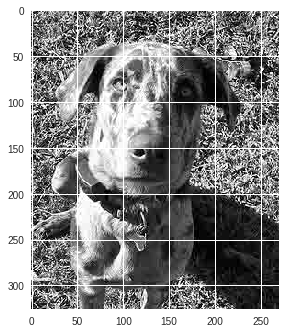

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [0]:
print(img_array)

[[191 155 230 ...  58 169 100]
 [134 125 165 ... 121 185  43]
 [186  33   1 ... 150 155  28]
 ...
 [  0  34  33 ...  30  30  19]
 [ 36  31  74 ...  30  30  19]
 [ 18  47  20 ...  25  25  14]]


In [0]:
print(img_array.shape)

(326, 270)


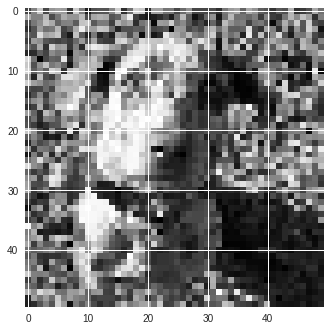

In [0]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [00:14<00:00, 866.18it/s]

24946


In [0]:
import random

random.shuffle(training_data)

In [0]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
1
0
1
0
0
0


In [0]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
!ls -lhrt

total 867M
-rw-r--r-- 1 root root  104 Feb 10  2017 'readme[1].txt'
-rw-r--r-- 1 root root  35K Feb 10  2017 'MSR-LA - 3467.docx'
-rw-r--r-- 1 root root 787M Feb 10  2017  kagglecatsanddogs_3367a.zip
-rwxr-xr-x 1 root root  16M Jul 15  2017  ngrok
drwxr-xr-x 2 root root 4.0K Nov 15 19:33  sample_data
drwxr-xr-x 4 root root 4.0K Nov 17 06:09  PetImages
drwxr-xr-x 3 root root 4.0K Nov 17 06:28  logs
-rw-r--r-- 1 root root 5.2M Nov 17 06:37  ngrok-stable-linux-amd64.zip
drwxr-xr-x 2 root root 4.0K Nov 17 06:42  log
-rw-r--r-- 1 root root  60M Nov 17 06:43  X.pickle
-rw-r--r-- 1 root root  49K Nov 17 06:43  y.pickle


## Now the actual code

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
X = X/255.0

In [0]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64,  128]
conv_layers = [1, 2, 3]


for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      NAME = "Cats-vs-dogs-CNN-{}-nodes-{}x2-dense-{}-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
      print(NAME)

      tensorboard = TensorBoard(log_dir="log/{}".format(NAME))

      model = Sequential()

      model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:], activation=K.relu))
      model.add(MaxPool2D(pool_size=(2, 2)))
      
      for _ in range(conv_layer - 1):
        model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:], activation=K.relu))
        model.add(MaxPool2D(pool_size=(2, 2)))

      model.add(Flatten()) # this converts our 2d feature maps to 1 d feature vectors
      
      for _ in range(dense_layer):
        model.add(Dense(layer_size, activation=K.relu))

      model.add(Dense(1, activation=K.sigmoid))

      model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
      
      EPOCHS = 10
      batch_size = 32

      model.fit(X, y,
                batch_size=batch_size,
                epochs=EPOCHS,
                validation_split=0.3,
                callbacks=[tensorboard])

Cats-vs-dogs-CNN-1-nodes-32x2-dense-0-1542439228
Train on 17462 samples, validate on 7484 samples
Epoch 1/10
17462/17462 [==============================] - 6s 333us/step - loss: 0.6310 - acc: 0.6411 - val_loss: 0.5911 - val_acc: 0.6900
Epoch 2/10
17462/17462 [==============================] - 5s 305us/step - loss: 0.5549 - acc: 0.7223 - val_loss: 0.5488 - val_acc: 0.7281
Epoch 3/10
17462/17462 [==============================] - 5s 297us/step - loss: 0.5145 - acc: 0.7499 - val_loss: 0.5490 - val_acc: 0.7297
Epoch 4/10
17462/17462 [==============================] - 5s 293us/step - loss: 0.4915 - acc: 0.7649 - val_loss: 0.5580 - val_acc: 0.7177
Epoch 5/10
17462/17462 [==============================] - 5s 309us/step - loss: 0.4724 - acc: 0.7795 - val_loss: 0.5314 - val_acc: 0.7465
Epoch 6/10
17462/17462 [==============================] - 6s 320us/step - loss: 0.4600 - acc: 0.7841 - val_loss: 0.5322 - val_acc: 0.7429
Epoch 7/10
17462/17462 [==============================] - 5s 308us/step - 

In [0]:
"""!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip"""

'!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip\n!unzip ngrok-stable-linux-amd64.zip'

In [0]:
"""LOG_DIR = './logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)"""

"LOG_DIR = './log'\nget_ipython().system_raw(\n    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'\n    .format(LOG_DIR)\n)"

In [0]:
"get_ipython().system_raw('./ngrok http 6006 &')"

"get_ipython().system_raw('./ngrok http 6006 &')"

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://3465b737.ngrok.io


In [0]:
get_ipython().system_raw('ps -ef | grep ngrok')

In [0]:
!tar cvf log.tar log

log/
log/Cats-vs-dogs-CNN-64x2-1542437153/
log/Cats-vs-dogs-CNN-64x2-1542437153/events.out.tfevents.1542437161.97737a2da0ad
log/Cats-vs-dogs-CNN-1-nodes-32x2-dense-1-1542440014/
log/Cats-vs-dogs-CNN-1-nodes-32x2-dense-1-1542440014/events.out.tfevents.1542440016.97737a2da0ad
log/Cats-vs-dogs-CNN-3-nodes-32x2-dense-1-1542440151/
log/Cats-vs-dogs-CNN-3-nodes-32x2-dense-1-1542440151/events.out.tfevents.1542440154.97737a2da0ad
log/Cats-vs-dogs-CNN-2-nodes-32x2-dense-0-1542439284/
log/Cats-vs-dogs-CNN-2-nodes-32x2-dense-0-1542439284/events.out.tfevents.1542439285.97737a2da0ad
log/Cats-vs-dogs-CNN-2-nodes-128x2-dense-2-1542441694/
log/Cats-vs-dogs-CNN-2-nodes-128x2-dense-2-1542441694/events.out.tfevents.1542441700.97737a2da0ad
log/Cats-vs-dogs-CNN-2-nodes-64x2-dense-1-1542440313/
log/Cats-vs-dogs-CNN-2-nodes-64x2-dense-1-1542440313/events.out.tfevents.1542440317.97737a2da0ad
log/Cats-vs-dogs-CNN-1-nodes-64x2-dense-0-1542439421/
log/Cats-vs-dogs-CNN-1-nodes-64x2-dense-0-1542439421/events.out.t

In [2]:
!ps -ef | grep ngrok

root         276       1  1 06:38 ?        00:01:34 ./ngrok http 6006
root        2129    2103  0 08:41 ?        00:00:00 /bin/bash -c ps -ef | grep ngrok
root        2131    2129  0 08:41 ?        00:00:00 grep ngrok


In [0]:
!kill -9 276

In [4]:
!ps -ef | grep ngrok

root        2135    2103  0 08:42 ?        00:00:00 /bin/bash -c ps -ef | grep ngrok
root        2137    2135  0 08:42 ?        00:00:00 grep ngrok
